In [29]:
# Imports
import csv
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.interpolate import interp1d

In [30]:
### Reading Provided Data

In [31]:
# File Names
spec_file = 'cs-137_spectrum.csv'
xs_file = 'cevns_xs_cs-137.csv'

In [32]:
# Read Spectrum CSV File
energies = []
counts = []

with open(spec_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0])*10**3)
        counts.append(float(row[1]))

In [33]:
# Read XS csv file
energies_xs = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_xs.append(float(row[0]))
        xs.append(float(row[1]))

In [34]:
# As the functions are defined by slightly different energies, I interpolate
xs_i = interp1d(energies_xs, xs)
counts_i = interp1d(energies, counts)

In [35]:
### Defining All Variables

In [36]:
# Defining Known Variables
N_A = 6.0221408*10**(23)  #atoms/mole
A = 64*0.486 + 66*0.279 + 67*0.041 + 68*0.188
mu = 3.10
source_amu = 136.907084  
half_life = 30.08*365*86400    #seconds

In [37]:
# Calculating Activity of Cs-137 (for 1g)
N_0 = N_A / source_amu 
dec_const = math.log(2)/half_life
source_flux = N_0 * dec_const  #bequerels
print('Source Activity = ' + str(source_flux) + ' Bq')

Source Activity = 3214149009471.0986 Bq


In [38]:
# Calculate Weighted Average XS
energies_xs.pop(-1)    # Last value was out of range of interp1d func
avg = []
weights = []
for e in energies_xs:
    avg.append(xs_i(e)*counts_i(e))
    weights.append(counts_i(e))
    
avg_xs = sum(avg)/sum(weights)
print('Average Cross Section = ' + str(avg_xs))

Average Cross Section = 1.3921862420915238e-42


In [39]:
# Combining Knowns
constant_term = (4*math.pi*mu*A)/(avg_xs*10**(-4)*N_A*source_flux)

In [40]:
### Final Calculations

In [41]:
# Now lets break it down! Starting with r=1m
M_s = range(1, 100000)

r1 = 1
M_dec_r1 = []
for m in M_s:
    M_dec_r1.append(constant_term*r1**2/(m*60*1000000))

r2 = 2
M_dec_r2 = []
for m in M_s:
    M_dec_r2.append(constant_term*r2**2/(m*60*1000000))
    
r3 = 3
M_dec_r3 = []
for m in M_s:
    M_dec_r3.append(constant_term*r3**2/(m*60*1000000))

r4 = 5
M_dec_r4 = []
for m in M_s:
    M_dec_r4.append(constant_term*r4**2/(m*60*1000000))

r5 = 10
M_dec_r5 = []
for m in M_s:
    M_dec_r5.append(constant_term*r5**2/(m*60*1000000))

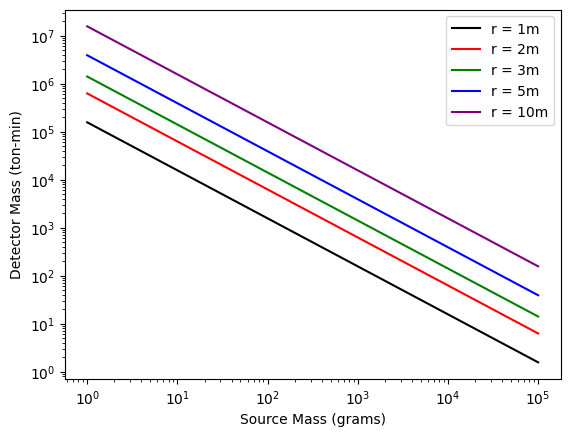

In [42]:
# Plot Results
plt.plot(M_s, M_dec_r1, color='black', label='r = 1m')
plt.plot(M_s, M_dec_r2, color='red', label='r = 2m')
plt.plot(M_s, M_dec_r3, color='green', label='r = 3m')
plt.plot(M_s, M_dec_r4, color='blue', label='r = 5m')
plt.plot(M_s, M_dec_r5, color='purple', label='r = 10m')

plt.legend()
plt.xlabel('Source Mass (grams)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Detector Mass (ton-min)')
plt.savefig('Cs-137_ratio.png')